In [1]:
import os
import sys
import torch
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from utils.custom_loader import XGBLoader

Load annotations

In [2]:
with open("../bipolar_eeg_dataset/dev_filtred_channel_based.json") as test_json:
    test_annot_list = json.load(test_json)

In [3]:
loader = XGBLoader(test_annot_list[123],window_size=2)

In [4]:
x = None
y = None
for x_,y_ in loader:
  if torch.any(y_):
    x,y = x_,y_
    break

print(y)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0.])


In [5]:
def plot_channels(x):
  fig, axs = plt.subplots(5,5,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})
  for i in range(22):
    axs[i // 5][i % 5].set_title(f"Channel {i}") 
    sns.lineplot(x[i],ax=axs[i // 5][i % 5])
  plt.show()

plot signal before FFT - for each channel

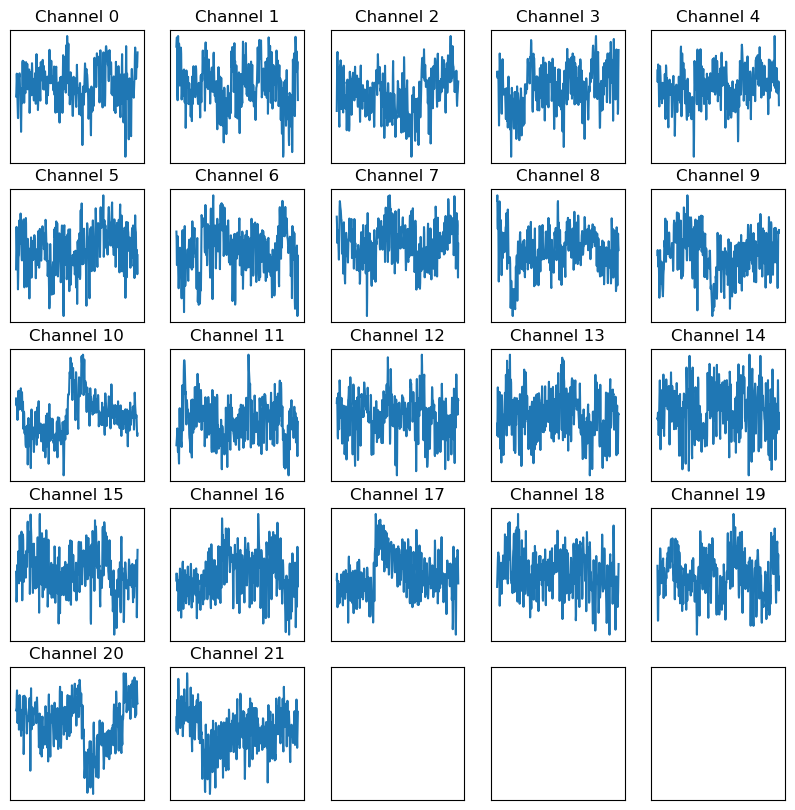

In [6]:
plot_channels(x)

Perform FFT and plot

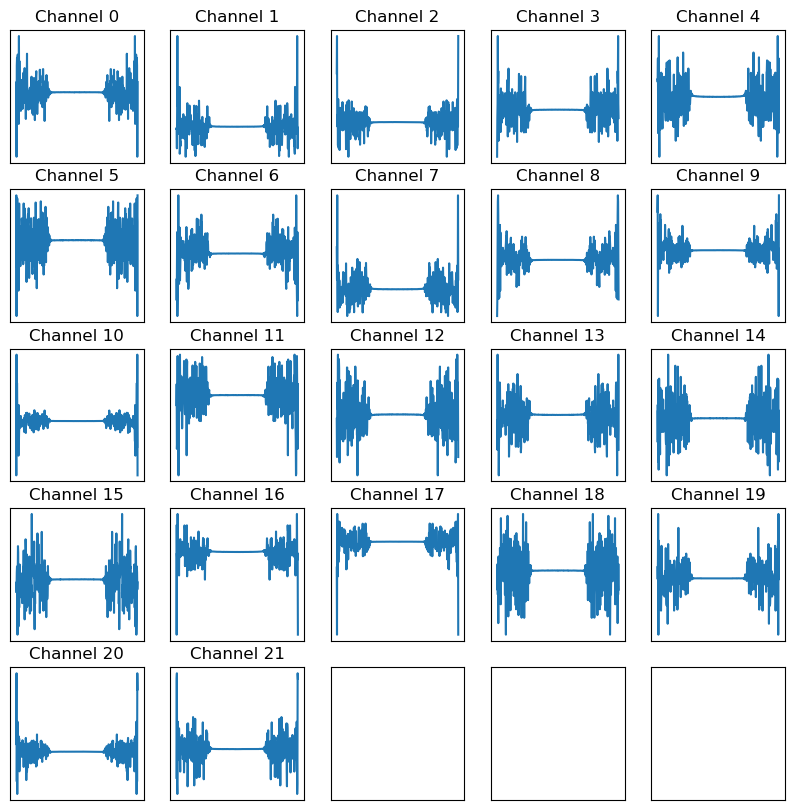

In [7]:
x_fft = torch.fft.fft(x,norm="ortho", dim=-1)
plot_channels(x_fft.real)

Extract the `Power spectral density` and plot.

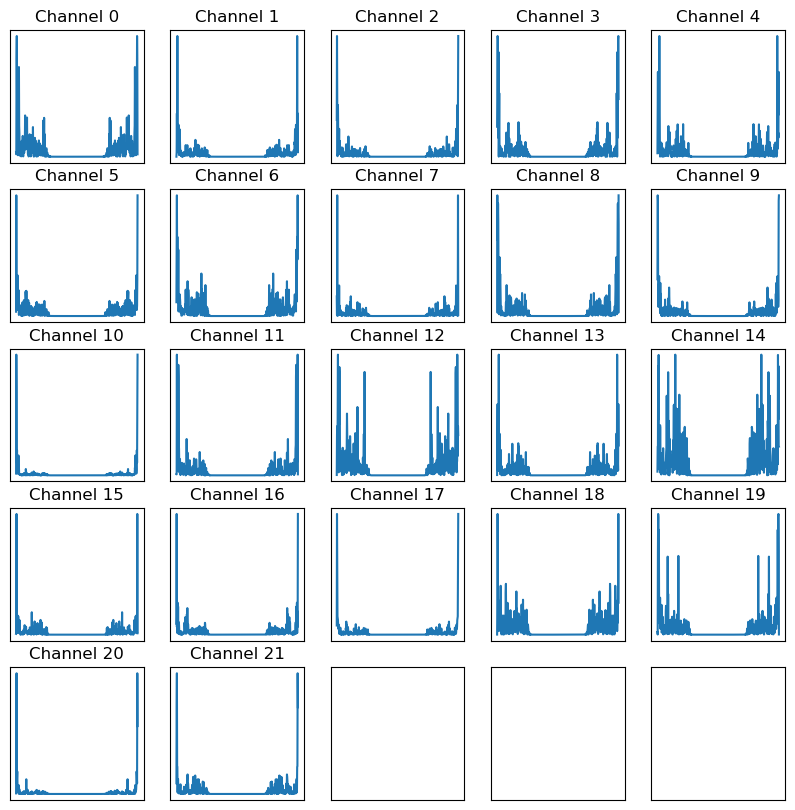

In [8]:
# Compute the power specturm of the signal
power_spectrum = torch.abs(x_fft)**2
# Normalize the power spectrum by the number of samples in the signal
power_spectrum /= power_spectrum.shape[-1]

plot_channels(power_spectrum)